In [ ]:
import lasinglib as ll
import simulationlib as sl
import shapes

import numpy as np
from IPython.display import HTML
import matplotlib.pyplot as plt

### Use 'widget' to make mpl outputs interactive, and 'inline' to make them render as pngs. 
# %matplotlib widget
%matplotlib inline

# initialize an environment to demonstrate pulses on

CHIP = sl.SimGrid(dimension=32, resolution=101, thickness=0.03, use_spar=False,
                  spar_thickness=0.5, spar_width=1)

SILICON = sl.Material(diffusivity=88, emissivity=0.09, specific_heat=0.7, density=0.002329002)

sim = sl.Simulation(CHIP, SILICON, duration=6, pulses=None, ambient_temp=300,
                    starting_temp=300, neumann_bc=True,
                    edge_derivative=0, sample_framerate=24, intended_pbs=1,
                    dense_logging=False, timestep_multi=0.75, radiation=True, progress_bar=True, silent=False)

## LaserSequences


Unordered list of pulses:
[Pulse(1.000W, 0.250 + 0.500S -> 0.750NOMOD), Pulse(1.000W, 0.250 + 0.500S -> 0.750NOMOD), Pulse(1.000W, 0.250 + 0.500S -> 0.750NOMOD), Pulse(1.000W, 0.250 + 0.500S -> 0.750NOMOD), Pulse(1.000W, 0.250 + 0.500S -> 0.750NOMOD), Pulse(1.000W, 0.250 + 0.500S -> 0.750NOMOD), Pulse(1.000W, 0.250 + 0.500S -> 0.750NOMOD), Pulse(1.000W, 0.250 + 0.500S -> 0.750NOMOD), Pulse(1.000W, 0.250 + 0.500S -> 0.750NOMOD), Pulse(1.000W, 0.250 + 0.500S -> 0.750NOMOD), Pulse(1.000W, 0.250 + 0.500S -> 0.750NOMOD), Pulse(1.000W, 0.250 + 0.500S -> 0.750NOMOD), Pulse(1.000W, 0.250 + 0.500S -> 0.750NOMOD), Pulse(1.000W, 0.250 + 0.500S -> 0.750NOMOD), Pulse(1.000W, 0.250 + 0.500S -> 0.750NOMOD), Pulse(1.000W, 0.250 + 0.500S -> 0.750NOMOD), Pulse(1.000W, 0.250 + 0.500S -> 0.750NOMOD), Pulse(1.000W, 0.250 + 0.500S -> 0.750NOMOD), Pulse(1.000W, 0.250 + 0.500S -> 0.750NOMOD), Pulse(1.000W, 0.250 + 0.500S -> 0.750NOMOD), Pulse(1.000W, 0.250 + 0.500S -> 0.750NOMOD), Pulse(1.000W, 0.250 + 0.500S

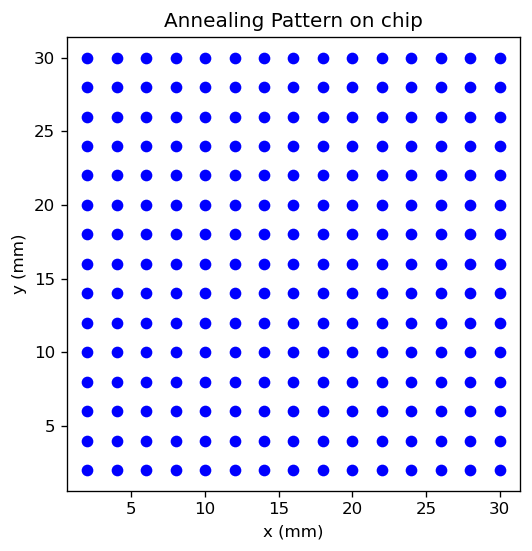

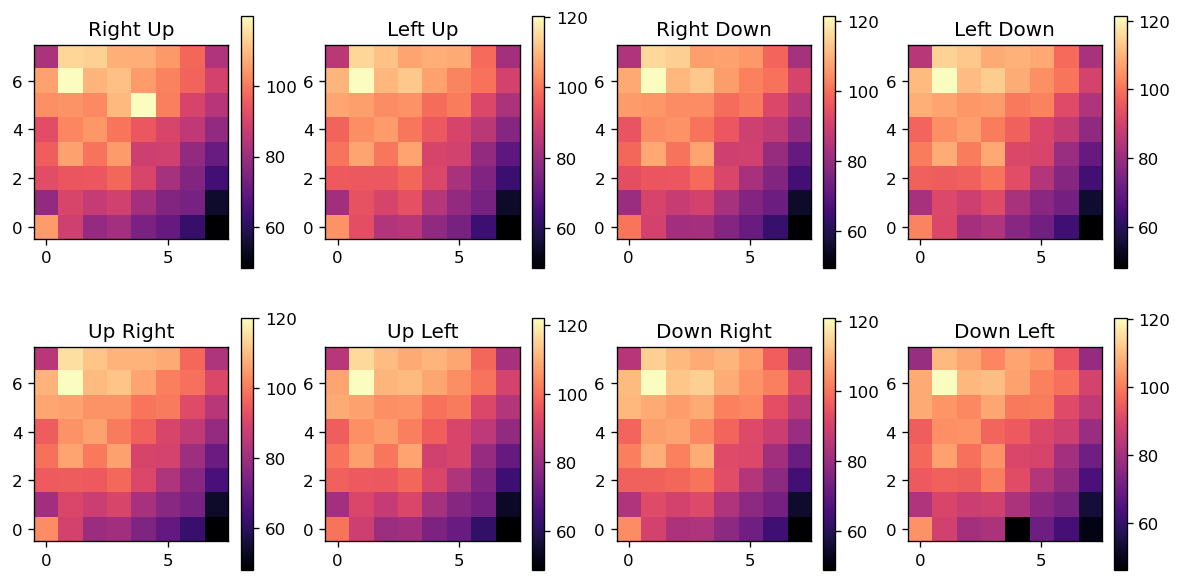

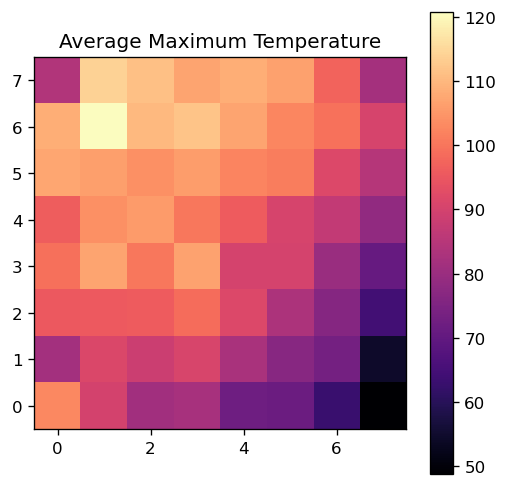

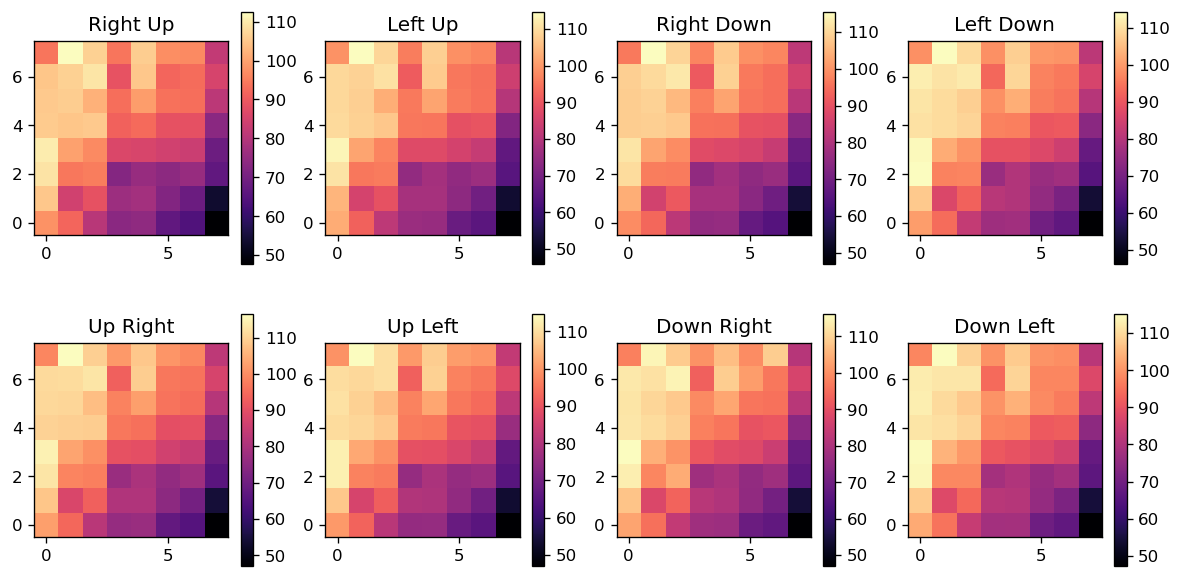

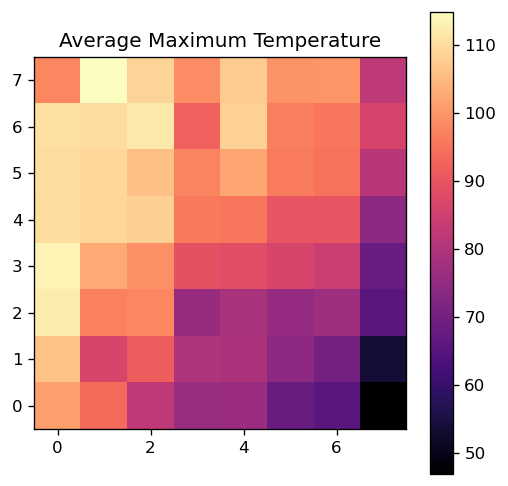

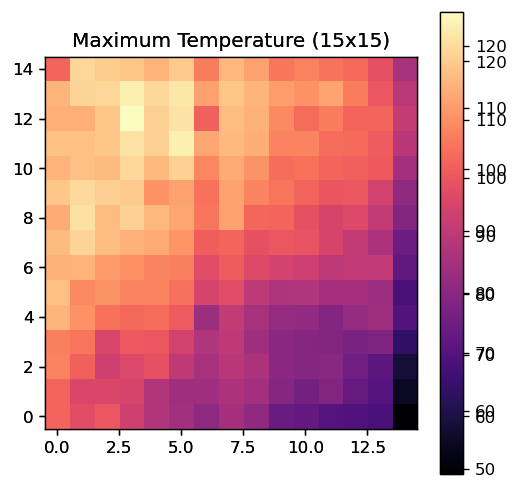

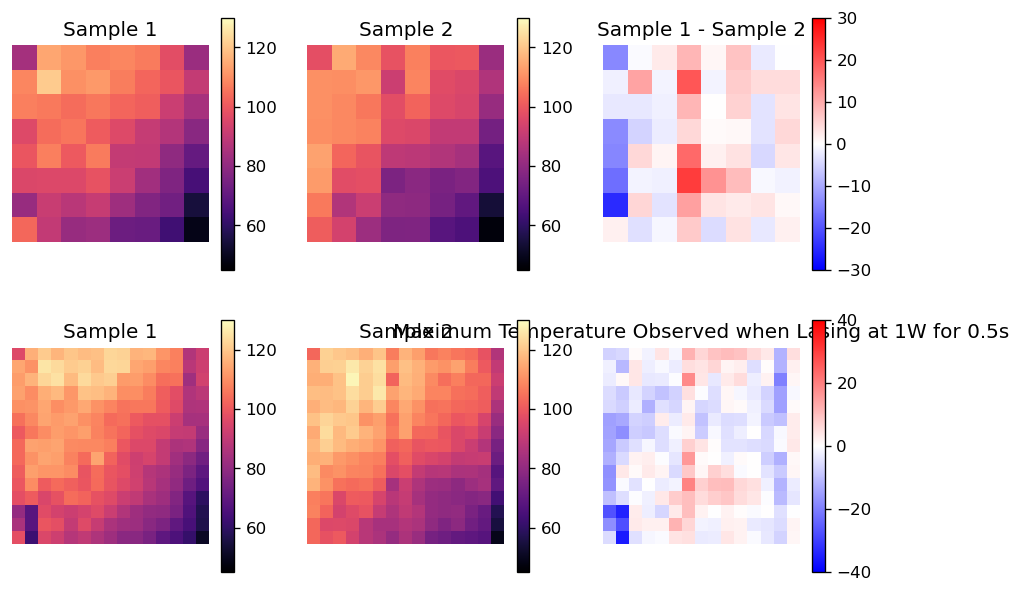

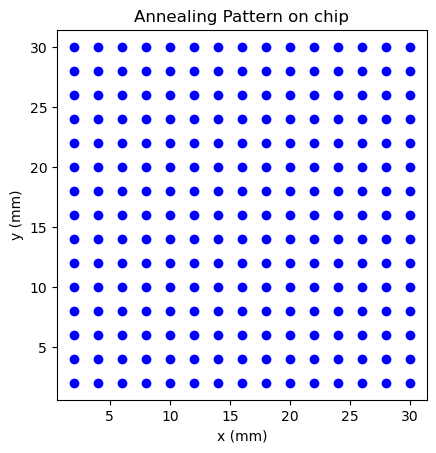

In [37]:
# number aranges to produce a grid
x_coords = np.arange(2, 32, 2)
y_coords = np.arange(2, 32, 2)

# use a lower-resolution SimGrid for a faster simulation so that you aren't here all day
chip_fast = sl.SimGrid(dimension=32, resolution=71, thickness=0.03, use_spar=False,
                  spar_thickness=0.5, spar_width=1)

# iterate over the grid, building a pulse for each location

pulses = []

for y in reversed(list(y_coords)):
    for x in reversed(list(x_coords)):
        # start time is arbitrary as the pulses will be arranged sequentially one put into a LaserSequence
        #if (((x == 2) or (x == 30)) or ((y == 2) or (y == 30))):
            pulses.append(ll.LaserPulse(grid=chip_fast, start=0.25, duration=0.5, position=(x, y), power=1, sigma=ll.DEFAULT_LASER_SIGMA))

print(f"Unordered list of pulses:\n{pulses}\n")

pulse_sequence = ll.LaserSequence(pulses, delay=5, start_time=1)

print(f"Ordered LaserSequence:\n{pulse_sequence}\n")


fig, ax = plt.subplots()
plt.gca().set_aspect('equal')

ax.set_title("Annealing Pattern on chip")
ax.plot(pulse_sequence.trace_x, pulse_sequence.trace_y, "bo")
ax.set_ylabel("y (mm)")
ax.set_xlabel("x (mm)")
plt.show()

### Simulation + Saving

In [38]:
'''
sim_fast = sl.Simulation(chip_fast, SILICON, duration=pulse_sequence.duration, pulses=None, ambient_temp=300,
                    starting_temp=300, neumann_bc=True,
                    edge_derivative=0, sample_framerate=24, intended_pbs=1,
                    dense_logging=False, timestep_multi=1, radiation=True, progress_bar=True, silent=False)

sim_fast.pulses = [pulse_sequence]
sim_fast.simulate()

ani = sim_fast.animate(cmap="magma")
plt.close()
# use plt.show() for more rigorous examinations
HTML(ani.to_jshtml())
'''

'\nsim_fast = sl.Simulation(chip_fast, SILICON, duration=pulse_sequence.duration, pulses=None, ambient_temp=300,\n                    starting_temp=300, neumann_bc=True,\n                    edge_derivative=0, sample_framerate=24, intended_pbs=1,\n                    dense_logging=False, timestep_multi=1, radiation=True, progress_bar=True, silent=False)\n\nsim_fast.pulses = [pulse_sequence]\nsim_fast.simulate()\n\nani = sim_fast.animate(cmap="magma")\nplt.close()\n# use plt.show() for more rigorous examinations\nHTML(ani.to_jshtml())\n'

In [39]:
 # Save the LaserPulse to cycle code under "example cycle code.txt"

CENTERING_OFFSETS = (-2, -1.5)

sample_interval = 0.05 # sample period if a pulse has some sort of parameterization (either or both position and current modulation)
pulse_sequence.write_to_cycle_code("./cycle code/15x15 Slow.txt", sample_interval, *CENTERING_OFFSETS)

## Sample 1

In [40]:
import optris_csv as ocsv
from scipy.signal import medfilt
ru_data = ocsv.OptrisDataset("./Slow Test (Right Up).dat").build_array_data()
lu_data = ocsv.OptrisDataset("./Slow Test (Left Up).dat").build_array_data()
rd_data = ocsv.OptrisDataset("./Slow Test (Right Down).dat").build_array_data()
ld_data = ocsv.OptrisDataset("./Slow Test (Left Down).dat").build_array_data()

ur_data = ocsv.OptrisDataset("./Slow Test (Up Right).dat").build_array_data()
ul_data = ocsv.OptrisDataset("./Slow Test (Up Left).dat").build_array_data()
dr_data = ocsv.OptrisDataset("./Slow Test (Down Right).dat").build_array_data()
dl_data = ocsv.OptrisDataset("./Slow Test (Down Left).dat").build_array_data()


TIME_CUTOFF = 9000
ru_data = ru_data[ru_data["time"] <= TIME_CUTOFF]
lu_data = lu_data[lu_data["time"] <= TIME_CUTOFF]
rd_data = rd_data[rd_data["time"] <= TIME_CUTOFF]
ld_data = ld_data[ld_data["time"] <= TIME_CUTOFF]

ur_data = ur_data[ur_data["time"] <= TIME_CUTOFF]
ul_data = ul_data[ul_data["time"] <= TIME_CUTOFF]
dr_data = dr_data[dr_data["time"] <= TIME_CUTOFF]
dl_data = dl_data[dl_data["time"] <= TIME_CUTOFF]

OPTRIS_SIGMA = 0.2

#print(dl_data.keys())

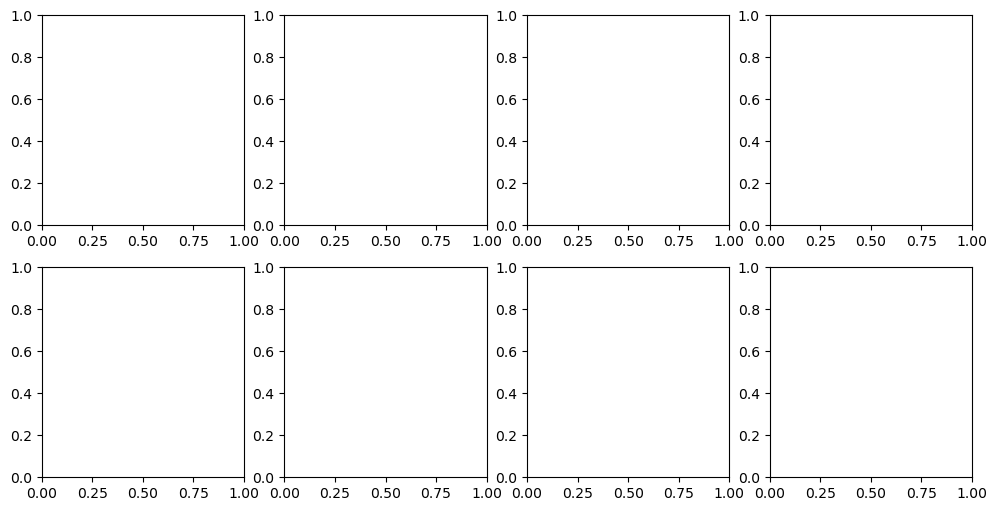

In [41]:
plt.close(1)
fig, ((ax1, ax2, ax3, ax4),(ax5, ax6, ax7, ax8)) = plt.subplots(2, 4, figsize = (12,6), num=1)

kernel_size = 15
axes = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8]
dataKeys = [("Right","Up"),
            ("Left","Up"),
            ("Right","Down"),
            ("Left","Down"),
            ("Up","Right"),
            ("Up","Left"),
            ("Down","Right"),
            ("Down","Left"),]

ru_temp = medfilt(ru_data["Detector Area"], kernel_size = kernel_size)
lu_temp = medfilt(lu_data["Detector Area"], kernel_size = kernel_size)
rd_temp = medfilt(rd_data["Detector Area"], kernel_size = kernel_size)
ld_temp = medfilt(ld_data["Detector Area"], kernel_size = kernel_size)

ur_temp = medfilt(ur_data["Detector Area"], kernel_size = kernel_size)
ul_temp = medfilt(ul_data["Detector Area"], kernel_size = kernel_size)
dr_temp = medfilt(dr_data["Detector Area"], kernel_size = kernel_size)
dl_temp = medfilt(dl_data["Detector Area"], kernel_size = kernel_size)



temperatures = [ru_temp, lu_temp, rd_temp, ld_temp, ur_temp, ul_temp, dr_temp, dl_temp]

plt.show()

In [42]:
def getMaxima(temperature):
    local_maxima = []
    trigger = 5
    i = 0
    current_maximum = 0
    current_minimum = np.inf

    for t in temperature:
        if i % 2 == 1:
            if t >= current_maximum - trigger:
                current_maximum = max(t, current_maximum)
            else:
                local_maxima.append(current_maximum)
                current_maximum = 0
                i += 1
        else: 
            if t <= current_minimum + trigger:
                current_minimum = min(t, current_minimum)
            else:
                current_minimum = np.inf
                i += 1

    print(f"{len(local_maxima)} local maxima found")
    return local_maxima


In [43]:
def tempMap(local_maxima, d1, d2):
    grid_length = int(np.sqrt(len(local_maxima)))
    maxima_map = np.zeros((grid_length,grid_length))

    for i in range(len(local_maxima)):
        if d1 == "Left":
            y = grid_length - (i % grid_length + 1)
        elif d1 == "Right":
            y = i % grid_length
        elif d1 == "Up":
            x = i % grid_length
        elif d1 == "Down":
            x = grid_length - (i % grid_length + 1)

        if d2 == "Left":
            y = grid_length - (i // grid_length + 1)
        elif d2 == "Right":
            y = i // grid_length
        elif d2 == "Up":
            x = i // grid_length
        elif d2 == "Down":
            x = grid_length - (i // grid_length + 1)

        maxima_map[x, y] = local_maxima[i]

    return maxima_map

64 local maxima found
64 local maxima found
64 local maxima found
64 local maxima found
64 local maxima found
64 local maxima found
64 local maxima found
64 local maxima found


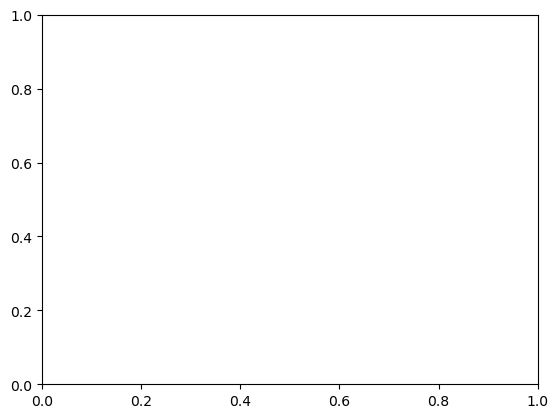

In [44]:
for i in range(len(temperatures)):
    ax = axes[i]
    d1, d2 = dataKeys[i]
    temp = temperatures[i]

    ax.set_title(d1 + " " + d2)
    img = ax.imshow(tempMap(getMaxima(temp), d1, d2),interpolation='nearest',
                        cmap = 'magma',                        origin='lower')
    plt.colorbar(img, cmap = 'magma')


64 local maxima found
64 local maxima found
64 local maxima found
64 local maxima found
64 local maxima found
64 local maxima found
64 local maxima found
64 local maxima found


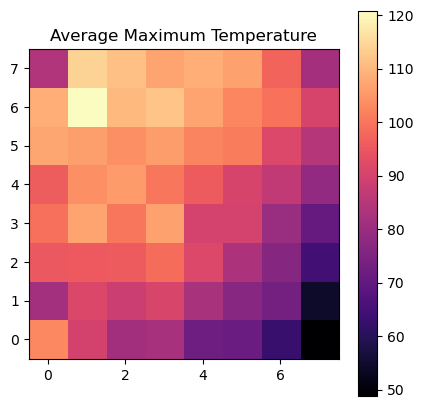

In [45]:
plt.close(2)
fig2, ax2 = plt.subplots(figsize = (5,5), num=2)
tempSum = np.zeros((8,8))

for i in range(len(temperatures)):
    d1, d2 = dataKeys[i]
    temp = temperatures[i]
    tempSum += tempMap(getMaxima(temp), d1, d2)

ax2.set_title("Average Maximum Temperature")
img2 = ax2.imshow(tempSum / (len(temperatures)),interpolation='nearest',
                    cmap = 'magma',
                    origin='lower')


plt.colorbar(img2, cmap = 'magma')

plt.show()

225 local maxima found
225 local maxima found


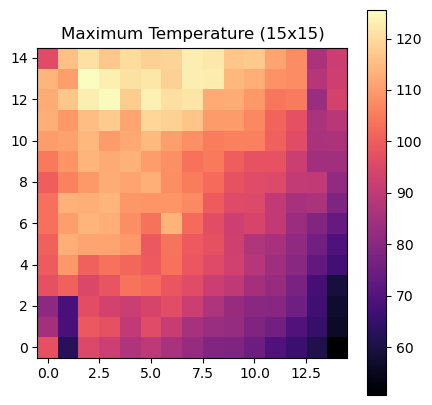

In [46]:
plt.close(3)
ru15_data = ocsv.OptrisDataset("./15x15 (Right Up).dat").build_array_data()
ru15_data = ru15_data[ru15_data["time"] <= TIME_CUTOFF]
ru15_temp = medfilt(ru15_data["Detector Area"], kernel_size = kernel_size)

ld15_data = ocsv.OptrisDataset("./15x15 (Left Down).dat").build_array_data()
ld15_data = ld15_data[ld15_data["time"] <= TIME_CUTOFF]
ld15_temp = medfilt(ld15_data["Detector Area"], kernel_size = kernel_size)

sample1_15 = (tempMap(getMaxima(ru15_temp), "Right", "Up") +
                             tempMap(getMaxima(ld15_temp), "Left", "Down")) / 2

fig3, ax3 = plt.subplots(figsize = (5,5), num=3)
ax3.set_title("Maximum Temperature (15x15)")
img3 = ax3.imshow(sample1_15,interpolation='nearest',
                    cmap = 'magma',
                    origin='lower')


plt.colorbar(img3, cmap = 'magma')

plt.show()

## Sample 2

In [47]:
import optris_csv as ocsv
from scipy.signal import medfilt
ru_data = ocsv.OptrisDataset("./Sample 2 Right Up.dat").build_array_data()
lu_data = ocsv.OptrisDataset("./Sample 2 Left Up.dat").build_array_data()
rd_data = ocsv.OptrisDataset("./Sample 2 Right Down.dat").build_array_data()
ld_data = ocsv.OptrisDataset("./Sample 2 Left Down.dat").build_array_data()

ur_data = ocsv.OptrisDataset("./Sample 2 Up Right.dat").build_array_data()
ul_data = ocsv.OptrisDataset("./Sample 2 Up Left.dat").build_array_data()
dr_data = ocsv.OptrisDataset("./Sample 2 Down Right.dat").build_array_data()
dl_data = ocsv.OptrisDataset("./Sample 2 Down Left.dat").build_array_data()

TIME_CUTOFF = 9000
ru_data = ru_data[ru_data["time"] <= TIME_CUTOFF]
lu_data = lu_data[lu_data["time"] <= TIME_CUTOFF]
rd_data = rd_data[rd_data["time"] <= TIME_CUTOFF]
ld_data = ld_data[ld_data["time"] <= TIME_CUTOFF]

ur_data = ur_data[ur_data["time"] <= TIME_CUTOFF]
ul_data = ul_data[ul_data["time"] <= TIME_CUTOFF]
dr_data = dr_data[dr_data["time"] <= TIME_CUTOFF]
dl_data = dl_data[dl_data["time"] <= TIME_CUTOFF]

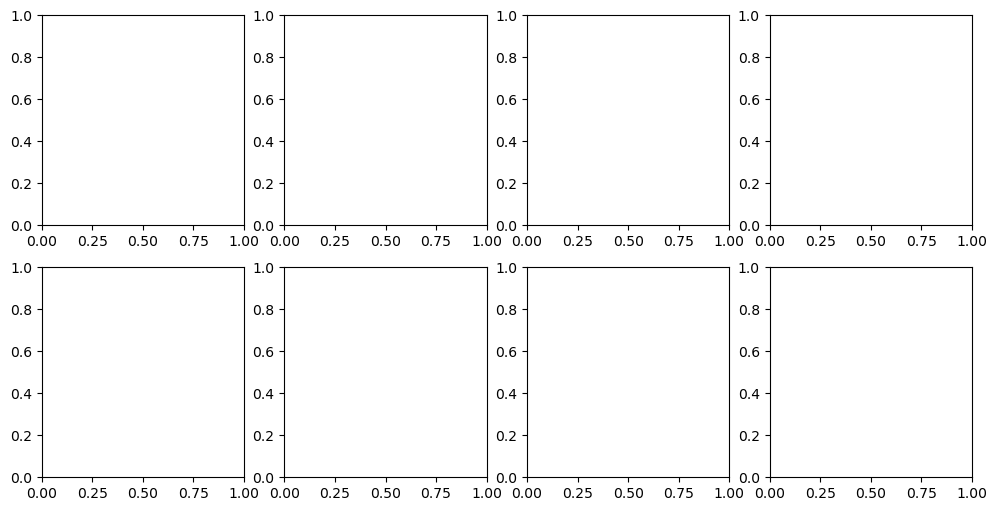

In [48]:
plt.close(4)
fig, ((ax1, ax2, ax3, ax4),(ax5, ax6, ax7, ax8)) = plt.subplots(2, 4, figsize = (12,6), num=4)

kernel_size = 15
axes = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8]
dataKeys = [("Right","Up"),
            ("Left","Up"),
            ("Right","Down"),
            ("Left","Down"),
            ("Up","Right"),
            ("Up","Left"),
            ("Down","Right"),
            ("Down","Left"),
            ]

ru_temp = medfilt(ru_data["Detector Area"], kernel_size = kernel_size)
lu_temp = medfilt(lu_data["Detector Area"], kernel_size = kernel_size)
rd_temp = medfilt(rd_data["Detector Area"], kernel_size = kernel_size)
ld_temp = medfilt(ld_data["Detector Area"], kernel_size = kernel_size)

ur_temp = medfilt(ur_data["Detector Area"], kernel_size = kernel_size)
ul_temp = medfilt(ul_data["Detector Area"], kernel_size = kernel_size)
dr_temp = medfilt(dr_data["Detector Area"], kernel_size = kernel_size)
dl_temp = medfilt(dl_data["Detector Area"], kernel_size = kernel_size)



temperatures2 = [ru_temp, 
                lu_temp, 
                rd_temp, 
                ld_temp, 
                ur_temp, 
                ul_temp, 
                dr_temp, 
                dl_temp
                ]

plt.show()

64 local maxima found
64 local maxima found
64 local maxima found
64 local maxima found
64 local maxima found
64 local maxima found
64 local maxima found
64 local maxima found


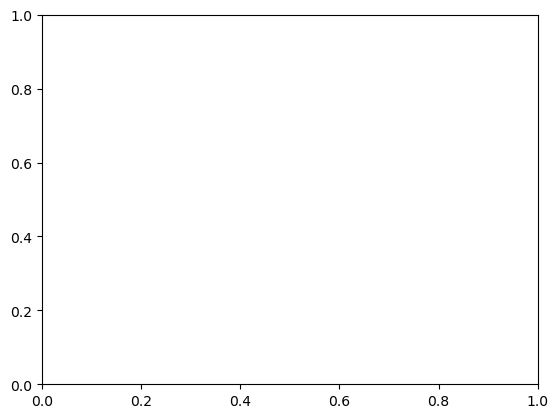

In [49]:
for i in range(len(temperatures2)):
    ax = axes[i]
    d1, d2 = dataKeys[i]
    temp = temperatures2[i]

    ax.set_title(d1 + " " + d2)
    img = ax.imshow(tempMap(getMaxima(temp), d1, d2),interpolation='nearest',
                        cmap = 'magma',                        origin='lower')
    plt.colorbar(img, cmap = 'magma')


64 local maxima found
64 local maxima found
64 local maxima found
64 local maxima found
64 local maxima found
64 local maxima found
64 local maxima found
64 local maxima found


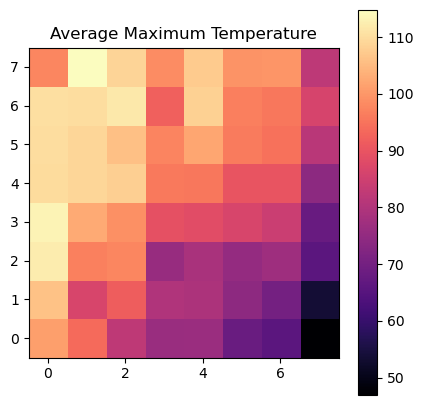

In [50]:
plt.close(5)
fig5, ax5 = plt.subplots(figsize = (5,5), num=5)
tempSum2 = np.zeros((8,8))

for i in range(len(temperatures2)):
    d1, d2 = dataKeys[i]
    temp = temperatures2[i]
    tempSum2 += tempMap(getMaxima(temp), d1, d2)

ax5.set_title("Average Maximum Temperature")
img5 = ax5.imshow(tempSum2 / (len(temperatures2)),interpolation='nearest',
                    cmap = 'magma',
                    origin='lower')


plt.colorbar(img5, cmap = 'magma')

plt.show()

225 local maxima found
225 local maxima found


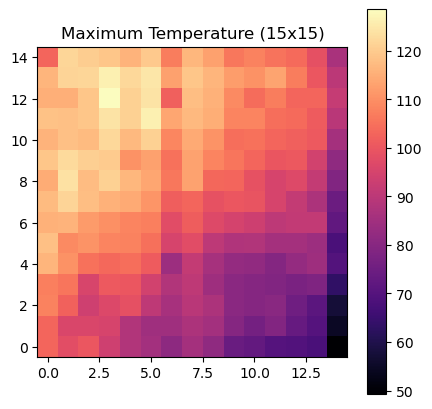

In [51]:
plt.close(6)
ru15_data2 = ocsv.OptrisDataset("./Sample 2 15x15 Right Up.dat").build_array_data()
ru15_data2 = ru15_data2[ru15_data2["time"] <= TIME_CUTOFF]
ru15_temp2 = medfilt(ru15_data2["Detector Area"], kernel_size = kernel_size)

ld15_data2 = ocsv.OptrisDataset("./Sample 2 15x15 Left Down.dat").build_array_data()
ld15_data2 = ld15_data2[ld15_data2["time"] <= TIME_CUTOFF]
ld15_temp2 = medfilt(ld15_data2["Detector Area"], kernel_size = kernel_size)

sample2_15 = (tempMap(getMaxima(ru15_temp2), "Right", "Up") +
                             tempMap(getMaxima(ld15_temp2), "Left", "Down")) / 2

fig3, ax3 = plt.subplots(figsize = (5,5), num=3)
ax3.set_title("Maximum Temperature (15x15)")
img3 = ax3.imshow(sample2_15,interpolation='nearest',
                    cmap = 'magma',
                    origin='lower')


plt.colorbar(img3, cmap = 'magma')

plt.show()

## Comparison

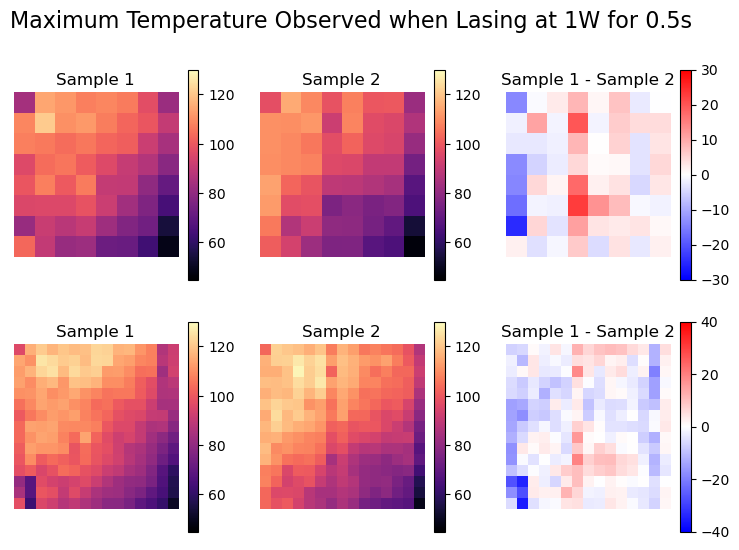

In [59]:
plt.close(7)
fig6, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize = (9,6), num=7)
fig6.suptitle("Maximum Temperature Observed when Lasing at 1W for 0.5s", fontsize=16)

#———————————————————————————————————————————————————————— 8 x 8 Grid Comparison ————————————————————————————————————————————————————————#

ax1.set_title("Sample 1")
img1 = ax1.imshow(tempSum / (len(temperatures)),interpolation='nearest',
                    cmap = 'magma',
                    origin='lower',
                    vmin = 45,
                    vmax = 130)
plt.colorbar(img1, cmap = 'magma')
ax1.set_axis_off()

ax2.set_title("Sample 2")
img2 = ax2.imshow(tempSum2 / (len(temperatures2)),interpolation='nearest',
                    cmap = 'magma',
                    origin='lower',
                    vmin = 45,
                    vmax = 130)
plt.colorbar(img2, cmap = 'magma')
ax2.set_axis_off()

ax3.set_title("Sample 1 - Sample 2")
img3 = ax3.imshow((tempSum / (len(temperatures))) - (tempSum2 / (len(temperatures2))),interpolation='nearest',
                    cmap = 'bwr',
                    origin='lower',
                    vmin = -30,
                    vmax = 30)
plt.colorbar(img3, cmap = 'bwr')
ax3.set_axis_off()

#———————————————————————————————————————————————————————— 15 x 15 Grid Comparison ————————————————————————————————————————————————————————#

ax4.set_title("Sample 1")
img4 = ax4.imshow(sample1_15,interpolation='nearest',
                    cmap = 'magma',
                    origin='lower',
                    vmin = 45,
                    vmax = 130)
plt.colorbar(img4, cmap = 'magma')
ax4.set_axis_off()

ax5.set_title("Sample 2")
img5 = ax5.imshow(sample2_15,interpolation='nearest',
                    cmap = 'magma',
                    origin='lower',
                    vmin = 45,
                    vmax = 130)
plt.colorbar(img5, cmap = 'magma')
ax5.set_axis_off()

ax6.set_title("Sample 1 - Sample 2")
img6 = ax6.imshow(sample1_15 - sample2_15,interpolation='nearest',
                    cmap = 'bwr',
                    origin='lower',
                    vmin =  -40,
                    vmax = 40)
plt.colorbar(img6, cmap = 'bwr')
ax6.set_axis_off()


plt.show()